In [7]:
import numpy as np
import keras
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

from PIL import Image
import requests
from io import BytesIO

In [8]:
#ResNet50

base_model=keras.applications.resnet.ResNet50(include_top=True, weights="imagenet", input_tensor=None, input_shape=(224,224,3), pooling='avg')
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

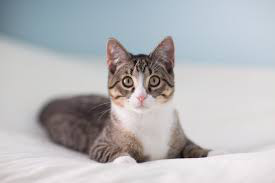

In [19]:
url='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTP-GtfXSgRebgOPnZrjAJFGWuz0NnCq0TG9Q&usqp=CAU'
response = requests.get(url)
pil_im = Image.open(BytesIO(response.content))
pil_im

In [20]:
x=np.asarray(pil_im)
x=preprocess_input(x)
x = np.expand_dims(x, 0)

res=base_model.predict(x)

In [21]:
np.sum(res)

1.0

In [22]:
decode_predictions(res, top=10)

[[('n02123045', 'tabby', 0.48547292),
  ('n02124075', 'Egyptian_cat', 0.1377394),
  ('n02123159', 'tiger_cat', 0.055253964),
  ('n02808440', 'bathtub', 0.049089134),
  ('n04493381', 'tub', 0.031953163),
  ('n04553703', 'washbasin', 0.027346645),
  ('n03887697', 'paper_towel', 0.023683097),
  ('n02127052', 'lynx', 0.018960739),
  ('n02123597', 'Siamese_cat', 0.015815934),
  ('n04589890', 'window_screen', 0.012139184)]]